# Libraries

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

tf.__version__

'2.3.0'

# Filtering data

In [11]:
skip_image = 0;
user_path = "/home/duc/Documents/Internship/dataset/dogCatKaggle/"
for folder_name in ("Cat","Dog"):
    folder_path = os.path.join(user_path+"PetImages",folder_name)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            file_obj = open(file_path,"rb")
            is_jfif = tf.compat.as_bytes("JFIF") in file_obj.peek(10)
        finally:
            file_obj.close()
        if not is_jfif:
            skip_image += 1
            #Delete corrupted image
            os.remove(file_path)

print("Deleted %d images" % skip_image)



Deleted 0 images


# Generated a dataset

In [12]:
image_size = (180, 180)
batch_size = 32

train_datasets = tf.keras.preprocessing.image_dataset_from_directory(
    user_path + "PetImages",
    validation_split = 0.2,
    subset = "training",
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

validation_datasets = tf.keras.preprocessing.image_dataset_from_directory(
    user_path + "PetImages",
    validation_split = 0.2,
    subset = "validation",
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


# Visualize the data

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


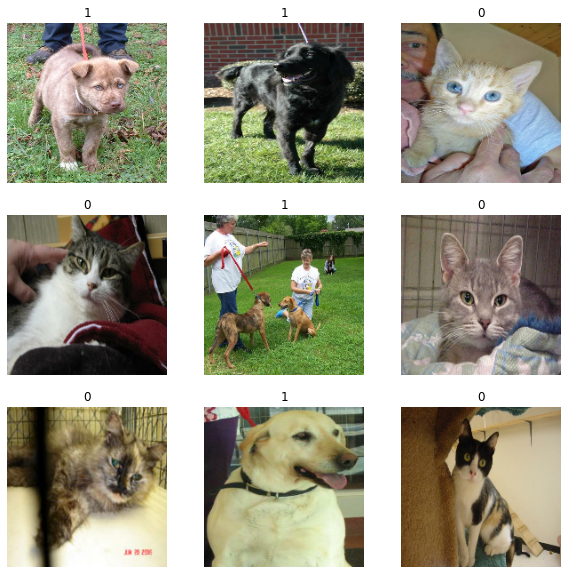

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_datasets.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
        

# Data augmentation

In [14]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

# Visualize data after augmentation

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


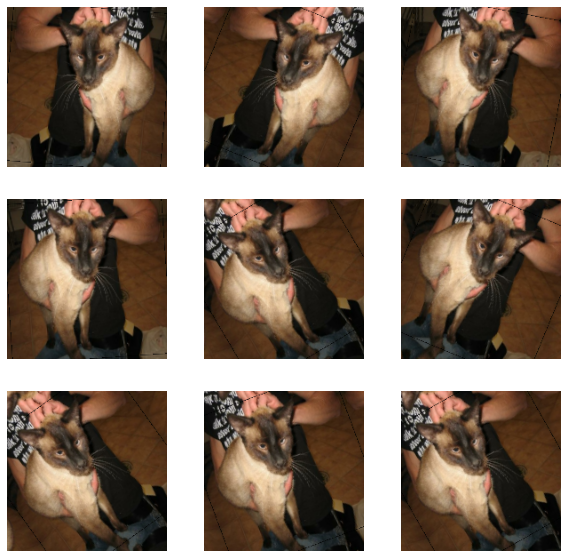

In [15]:
plt.figure(figsize=(10, 10))
for images,_ in train_datasets.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [16]:
train_ds = train_datasets.prefetch(buffer_size = 32)
val_ds = validation_datasets.prefetch(buffer_size = 32)


# Standardizing the data

In [17]:
# Option 1: Make it part of the model -> better for training on GPU
#input_shape = (180, 180)
#inputs = keras.Input(shape = input_shape)
#x = data_augmentation(inputs)
#x = layers.experimental.preprocessing.Rescaling(1./255)(x)

# Option 2: Apply it to the dataset -> better for training on CPU
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

NotImplementedError: in user code:

    /tmp/ipykernel_98313/1984348911.py:8 None  *
        augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__  **
        outputs = call_fn(inputs, *args, **kwargs)
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:386 call
        outputs = layer(inputs, **kwargs)
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/keras/layers/preprocessing/image_preprocessing.py:822 call
        output = tf_utils.smart_cond(training, random_rotated_inputs,
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/keras/utils/tf_utils.py:64 smart_cond
        return smart_module.smart_cond(
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/framework/smart_cond.py:54 smart_cond
        return true_fn()
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/keras/layers/preprocessing/image_preprocessing.py:818 random_rotated_inputs
        get_rotation_matrix(angles, img_hd, img_wd),
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/keras/layers/preprocessing/image_preprocessing.py:722 get_rotation_matrix
        array_ops.zeros((num_angles, 2), dtypes.float32),
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2747 wrapped
        tensor = fun(*args, **kwargs)
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2794 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2732 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3030 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    /home/duc/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:845 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (sequential/random_rotation/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


# Preparing dataset for option 2

In [18]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds):
    ds = ds.batch(batch_size)
    ds = train_ds.map(
        lambda x, y: (data_augmentation(x, training=True), y))
    return ds.prefetch(buffer_size=AUTOTUNE)

train_datasets = prepare(train_datasets)
validation_datasets = prepare(validation_datasets)

AttributeError: module 'tensorflow._api.v2.data' has no attribute 'AUTOTUNE'

# Configure the dataset for performance

# Build a model

In [13]:
import tensorflow.keras.backend as K

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape = input_shape)
    
    # Image augmentation block
    #x = inputs
    x = data_augmentation(inputs)
    #augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
    
    #Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides = 2, padding = "same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(64, 3, padding = "same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    previous_block_activation = x # set aside residual
    
    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding = "same")(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding = "same")(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.MaxPooling2D(3, strides = 2, padding = "same")(x)
        
        #project residual
        residual = layers.Conv2D(size, 1, strides = 2, padding = "same")(
            previous_block_activation
        )
        
        x = layers.add([x, residual]) # Add back residual
        previous_block_activation = x # set aside next residual
    
    x = layers.SeparableConv2D(1024, 3, padding = "same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes
        
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation = activation)(x)
    return keras.Model(inputs, outputs)

In [14]:
model = make_model(input_shape=image_size + (3,), num_classes = 2)
model.summary()
#keras.utils.plot_model(model, show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 180, 180, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 180, 180, 3)  0           sequential[0][0]                 
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 90, 90, 32)   896         rescaling[0][0]                  
______________________________________________________________________________________________

# Train the model

In [15]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

model.compile(optimizer = keras.optimizers.Adam(1e-3),
             loss = "binary_crossentropy",
             metrics = ["accuracy"],
             )

model.fit(
    train_ds, epochs = epochs, callbacks = callbacks, validation_data = val_ds,
)

Epoch 1/20
290/586 [=============>................] - ETA: 9:13 - loss: 0.6895 - accuracy: 0.6083

KeyboardInterrupt: 